In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32b267433e99609656502dc92b1364ba


In [3]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32b267433e99609656502dc92b1364ba&q=Boston


In [4]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [6]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":55.94,"feels_like":55.51,"temp_min":51.37,"temp_max":59.67,"pressure":1012,"humidity":91},"visibility":10000,"wind":{"speed":8.05,"deg":200},"clouds":{"all":75},"dt":1665117472,"sys":{"type":1,"id":3486,"country":"US","sunrise":1665139664,"sunset":1665180966},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [7]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.94,
  'feels_like': 55.51,
  'temp_min': 51.37,
  'temp_max': 59.67,
  'pressure': 1012,
  'humidity': 91},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1665117472,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1665139664,
  'sunset': 1665180966},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.94,
  'feels_like': 55.51,
  'temp_min': 51.37,
  'temp_max': 59.67,
  'pressure': 1012,
  'humidity': 91},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1665117472,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1665139664,
  'sunset': 1665180966},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data = city_weather.json()

In [11]:
boston_data['sys']["country"]

'US'

In [12]:
boston_data["dt"]

1665117472

In [13]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 59.67 91 75 8.05


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-07 04:37:52'

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

620

In [19]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | namatanai
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | darhan
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | conde
Processing Record 14 of Set 1 | santiago del estero
Processing Record 15 of Set 1 | krasnaya gora
Processing Record 16 of Set 1 | jalu
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | baghdad
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | kwekwe
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 

Processing Record 41 of Set 4 | sibu
Processing Record 42 of Set 4 | pak phanang
Processing Record 43 of Set 4 | cooper city
Processing Record 44 of Set 4 | waddan
Processing Record 45 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 46 of Set 4 | kinablangan
Processing Record 47 of Set 4 | la cruz
Processing Record 48 of Set 4 | ixtapa
Processing Record 49 of Set 4 | comodoro rivadavia
Processing Record 50 of Set 4 | souillac
Processing Record 1 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | pemba
Processing Record 5 of Set 5 | verkhnevilyuysk
Processing Record 6 of Set 5 | kontagora
Processing Record 7 of Set 5 | willowmore
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | caucaia
Processing Record 10 of Set 5 | aripuana
Processing Record 11 of Set 5 | sao mateus do maranhao
Processing Record 12 of Set 5 | aswan
Processing

Processing Record 26 of Set 8 | la asuncion
Processing Record 27 of Set 8 | aquiraz
Processing Record 28 of Set 8 | anadyr
Processing Record 29 of Set 8 | zabid
Processing Record 30 of Set 8 | banjar
Processing Record 31 of Set 8 | malartic
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 8 | chitipa
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | valdivia
Processing Record 37 of Set 8 | acari
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | taiyuan
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | salvador
Processing Record 43 of Set 8 | tekeli
Processing Record 44 of Set 8 | sept-iles
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | san cristobal
Processing Record 47 of Set 8 | ostrovnoy
Processing Record 48 of Set 8 | enumclaw
Processing Record 49 of S

Processing Record 16 of Set 12 | balabac
Processing Record 17 of Set 12 | oistins
Processing Record 18 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 19 of Set 12 | magdalena
Processing Record 20 of Set 12 | wad rawah
Processing Record 21 of Set 12 | covilha
Processing Record 22 of Set 12 | zemio
Processing Record 23 of Set 12 | hazorasp
Processing Record 24 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 25 of Set 12 | sayyan
Processing Record 26 of Set 12 | dzaoudzi
Processing Record 27 of Set 12 | mancio lima
Processing Record 28 of Set 12 | karasburg
Processing Record 29 of Set 12 | colesberg
Processing Record 30 of Set 12 | puerto pinasco
City not found. Skipping...
Processing Record 31 of Set 12 | russkaya polyana
Processing Record 32 of Set 12 | college
Processing Record 33 of Set 12 | berdigestyakh
Processing Record 34 of Set 12 | arman
Processing Record 35 of Set 12 | dibulla
Processing Record 36 of Set 12 | porto da folha
Processi

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,51.49,98,100,19.33,CL,2022-10-07 04:44:31
1,Namatanai,-3.6667,152.4333,85.51,58,100,11.61,PG,2022-10-07 04:44:31
2,Luderitz,-26.6481,15.1594,59.02,52,19,16.42,NA,2022-10-07 04:44:32
3,Qaanaaq,77.4840,-69.3632,13.64,82,100,7.38,GL,2022-10-07 04:44:32
4,Tasiilaq,65.6145,-37.6368,33.96,69,10,4.43,GL,2022-10-07 04:43:20
5,Sao Joao Da Barra,-21.6403,-41.0511,72.09,90,76,15.01,BR,2022-10-07 04:44:33
6,Norman Wells,65.2820,-126.8329,37.44,75,20,2.30,CA,2022-10-07 04:42:21
7,Rikitea,-23.1203,-134.9692,70.29,71,13,22.84,PF,2022-10-07 04:43:16
8,Darhan,49.4867,105.9228,42.26,44,100,20.58,MN,2022-10-07 04:44:34
9,Bengkulu,-3.8004,102.2655,78.06,72,100,3.65,ID,2022-10-07 04:44:34


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/07/22'

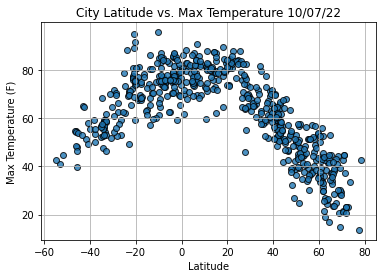

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

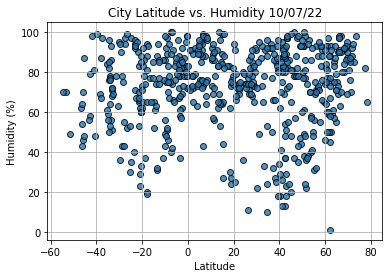

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

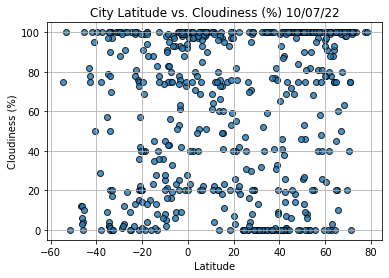

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

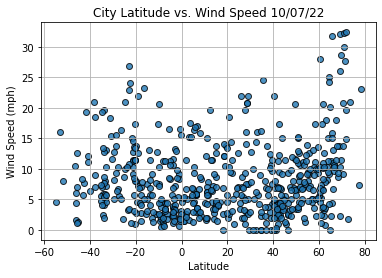

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()